<a href="https://colab.research.google.com/github/NithinNarayanan07/Machine-Learning/blob/main/ML_review2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import missingno as msno


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Movies1.csv')
df

,Unnamed: 0,userId,movieId,title,genres,review,rating
0,0,1.0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1,1.0,2.0,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,2,1.0,3.0,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,3,1.0,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,4,1.0,5.0,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...,...
50008,50008,302.0,120729.0,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,50009,186.0,120731.0,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,50010,18.0,120733.0,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2
50011,50011,24.0,120735.0,Love Chronicles (2003),Drama|Romance,itÆs a well developed storyline without any lag,9.5


# ***Imputation***

In [44]:
df.dtypes                 # data type of each column

Unnamed: 0      int64
userId        float64
movieId       float64
title          object
genres         object
review         object
rating        float64
dtype: object

In [45]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)  # dropped column named unknown

In [46]:
df.isnull().sum()

userId        1
movieId       1
title         1
genres     3759
review      103
rating        0
dtype: int64

In [47]:
df.drop(50012,axis=0,inplace=True)  # dropped last row

In [48]:
df

,userId,movieId,title,genres,review,rating
0,1.0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1.0,2.0,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,1.0,3.0,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,1.0,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,1.0,5.0,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...
50007,397.0,120641.0,Santa Fe (1951),Action|Romance|Western,it isnt good and I am very disappoined,6.1
50008,302.0,120729.0,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,186.0,120731.0,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,18.0,120733.0,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2


In [49]:
df.isnull().sum() # count of null value in each column

userId        0
movieId       0
title         0
genres     3758
review      103
rating        0
dtype: int64

In [50]:
df.dtypes

userId     float64
movieId    float64
title       object
genres      object
review      object
rating     float64
dtype: object

In [51]:
df['userId']=df['userId'].astype(int)     # changing datatype to int from float

In [52]:
df['movieId']=df['movieId'].astype(int)   # changing datatype to int from float

In [53]:
df

,userId,movieId,title,genres,review,rating
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,1,3,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,1,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,1,5,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...
50007,397,120641,Santa Fe (1951),Action|Romance|Western,it isnt good and I am very disappoined,6.1
50008,302,120729,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,186,120731,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,18,120733,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2


In [54]:
df.loc[df['genres'].isnull()==True,'movieId'] # checking null values in column genres

15881     83773
16060     84768
16351     86493
16491     87061
17404     91246
          ...  
49968    179995
49972    180003
49973    180005
49993    180049
49995    180053
Name: movieId, Length: 3758, dtype: int64

In [55]:
df['genres'].fillna('All',inplace=True)     # filling nan values

In [56]:
df['review'].fillna('Good',inplace=True)    # filling nan values

In [57]:
df.isnull().sum()       # final count of null values

userId     0
movieId    0
title      0
genres     0
review     0
rating     0
dtype: int64

## ***Preprocessing***

In [58]:
df.describe()         # dataframe description excluding categorical data

,userId,movieId,rating
count,50012.000000,50012.000000,50012.000000
mean,195.318943,104437.677777,6.627409
std,116.375446,58237.662083,2.794826
min,1.000000,1.000000,1.000000
25%,92.000000,60467.500000,4.300000
50%,187.000000,122759.000000,7.500000
75%,294.000000,152784.000000,9.000000
max,406.000000,180061.000000,10.000000


In [59]:
df2=df[['movieId','title','review','rating',"genres"]]      # creating new dataframe by copying column values

In [60]:
df2

,movieId,title,review,rating,genres
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Good,8.4,Comedy|Romance
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,Comedy
...,...,...,...,...,...
50007,120641,Santa Fe (1951),it isnt good and I am very disappoined,6.1,Action|Romance|Western
50008,120729,Mexican Spitfire's Elephant (1942),The story line is taken in a good manner,10.0,Comedy|Romance
50009,120731,Revolt of the Slaves (1960),It is very exciting and is such a wonderfull m...,9.0,Adventure
50010,120733,Mexican Spitfire Sees a Ghost (1942),the end credits are so good that I busted out ...,9.2,Comedy


**Creating** a new column called sentiment based on ratings

In [61]:
for i in range(len(df2)):
  if df2.iloc[i]['rating']>=8.0:
    df2.at[i,'sentiment']="GOOD"
  elif df2.iloc[i]['rating']<8 and df2.iloc[i]['rating']>=6:
    df2.at[i,'sentiment']="ABOVE AVERAGE"
  elif df2.iloc[i]['rating']<6 and df2.iloc[i]['rating']>=5:
    df2.at[i,'sentiment']="BELOW AVERAGE"
  else:
    df2.at[i,'sentiment']="BAD"


  

In [63]:
df2 # after creating new column 

,movieId,title,review,rating,genres,sentiment
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,Adventure|Animation|Children|Comedy|Fantasy,GOOD
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,Adventure|Children|Fantasy,GOOD
2,3,Grumpier Old Men (1995),Good,8.4,Comedy|Romance,GOOD
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,Comedy|Drama|Romance,BELOW AVERAGE
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,Comedy,GOOD
...,...,...,...,...,...,...
50007,120641,Santa Fe (1951),it isnt good and I am very disappoined,6.1,Action|Romance|Western,ABOVE AVERAGE
50008,120729,Mexican Spitfire's Elephant (1942),The story line is taken in a good manner,10.0,Comedy|Romance,GOOD
50009,120731,Revolt of the Slaves (1960),It is very exciting and is such a wonderfull m...,9.0,Adventure,GOOD
50010,120733,Mexican Spitfire Sees a Ghost (1942),the end credits are so good that I busted out ...,9.2,Comedy,GOOD


In [64]:
lb_make = LabelEncoder()              # label encoding the categorical data sentiment
df2['sent_code'] = lb_make.fit_transform(df2['sentiment'])

In [65]:
df2.head(10)            #final dataframe after preprocessing

,movieId,title,review,rating,genres,sentiment,sent_code
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,Adventure|Animation|Children|Comedy|Fantasy,GOOD,3
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,Adventure|Children|Fantasy,GOOD,3
2,3,Grumpier Old Men (1995),Good,8.4,Comedy|Romance,GOOD,3
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,Comedy|Drama|Romance,BELOW AVERAGE,2
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,Comedy,GOOD,3
5,6,Heat (1995),"Probably my all-time favorite movie, a story o...",8.0,Action|Crime|Thriller,GOOD,3
6,7,Sabrina (1995),I sure would like to see a resurrection of a u...,9.2,Comedy|Romance,GOOD,3
7,8,Tom and Huck (1995),"This show was an amazing, fresh & innovative i...",6.4,Adventure|Children,ABOVE AVERAGE,0
8,9,Sudden Death (1995),Encouraged by the positive comments about this...,1.5,Action,BAD,1
9,10,GoldenEye (1995),If you like original gut wrenching laughter yo...,8.1,Action|Adventure|Thriller,GOOD,3


In [66]:
df2.dtypes

movieId        int64
title         object
review        object
rating       float64
genres        object
sentiment     object
sent_code      int64
dtype: object

In [67]:
df2['title']=df2['title'].astype(str)

In [68]:
df.dtypes

userId       int64
movieId      int64
title       object
genres      object
review      object
rating     float64
dtype: object

In [69]:
from scipy import stats        # z score calculation
l=df2['rating']
print(stats.zscore(l))

[0.92049263 0.81315033 0.6342465  ... 0.8489311  0.92049263 1.02783493]


GOOD             24992
BAD              14210
ABOVE AVERAGE     7172
BELOW AVERAGE     3638
Name: sentiment, dtype: int64


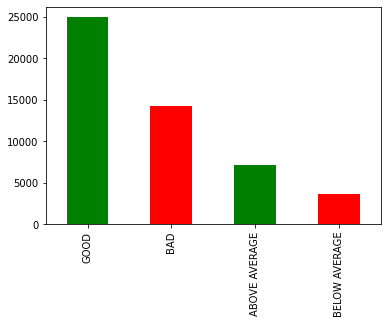

In [70]:
print(df2.sentiment.value_counts())
df4=df2.sentiment.value_counts().plot(kind="bar",color=['green','red'])

            movieId    rating  sent_code
movieId    1.000000  0.005463  -0.000127
rating     0.005463  1.000000   0.693416
sent_code -0.000127  0.693416   1.000000


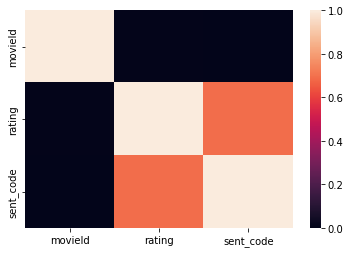

In [71]:
df3 =df2.corr(method='pearson')
print(df3)
sns.heatmap(df3,xticklabels="auto",yticklabels="auto")

In [72]:
print('Minimum Rating Value=',np.amin(df2['rating']))
print('Maximum Rating Value=',np.amax(df2['rating']))

Minimum Rating Value= 1.0
Maximum Rating Value= 10.0


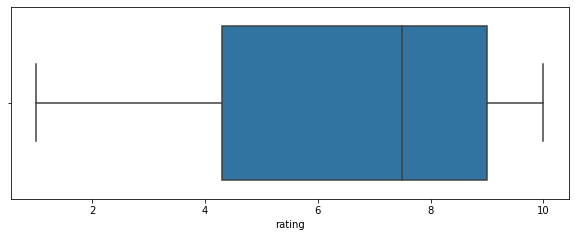

In [73]:
plt.subplots(figsize = (10,12))
plt.subplot(3,1,1)
sns.boxplot(x=df2['rating'])

In [77]:
threshold = 3             #outlier using z-score
outlier = []
mean=np.mean(df2['rating'])
std=np.std(df2['rating'])
for i in df2['rating']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


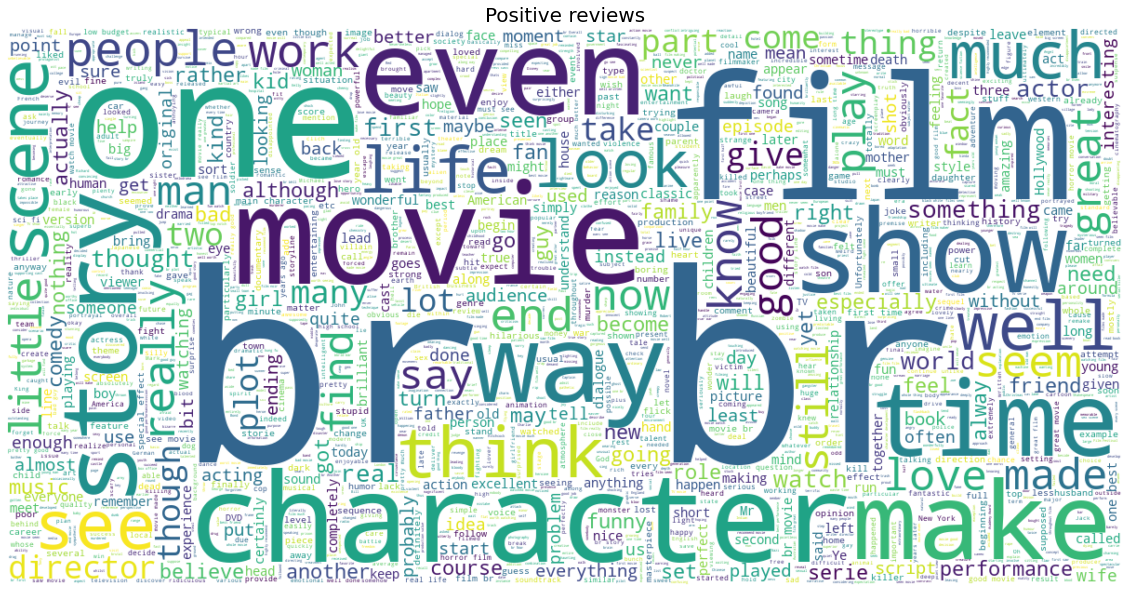

In [78]:
#Detecting the repeatedly used positive words 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

positive_data = df2[(df2.sent_code == 0) | (df2.sent_code ==3)]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive reviews',fontsize = 20)
plt.show()

In [76]:
#3Nithin

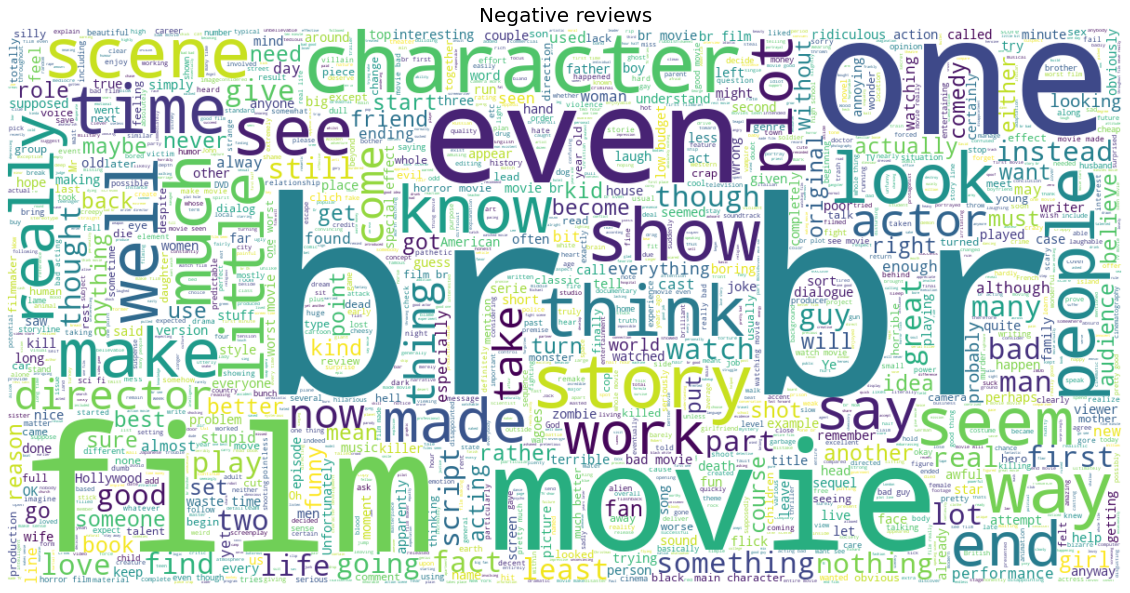

In [79]:
#Detecting the repeatedly used negative words
#negative_data = df2[df2.sent_code == 0]['review']
positive_data = df2[(df2.sent_code == 1) | (df2.sent_code ==2)]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative reviews',fontsize = 20)
plt.show()

In [80]:
df=df2


In [89]:
#x=input("Enter a genere you would like to search")
x="Comedy"
a=[]
for i in df.index:
  #print(df.iloc[i,4])
  s=df.iloc[i,4]
  l=s.split('|')
  #rint(l,df.iloc[i,6])
  
  if (l[0]=="All" or x in l) and (df.iloc[i,6]==0 or df.iloc[i,6]==3):
    a.append(df.iloc[i,1])
    if len(a)==5:
      break
#print(df.iloc[0,5])
print("The recommended movies for your searched genre is:\n")
print(a)

  


The recommended movies for your searched genre is:

['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Father of the Bride Part II (1995)', 'Sabrina (1995)', 'Dracula: Dead and Loving It (1995)']


In [90]:
 x="film show br movie is Penitentary."
#print(positive_data_string)
l=x.split()
a=positive_data_string.split()
b=negative_data_string.split()
count=0
for i in l:
  if i in a:
    count+=1;
  if i in b:
    count-=1;

if count>=1:
  print("The review is positive")
elif count<0:

  print("The review is negative")
else :
  print("Neither positive nor negative review")

The review is positive


In [93]:
df

,movieId,title,review,rating,genres,sentiment,sent_code
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,Adventure|Animation|Children|Comedy|Fantasy,GOOD,3
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,Adventure|Children|Fantasy,GOOD,3
2,3,Grumpier Old Men (1995),Good,8.4,Comedy|Romance,GOOD,3
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,Comedy|Drama|Romance,BELOW AVERAGE,2
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,Comedy,GOOD,3
...,...,...,...,...,...,...,...
50007,120641,Santa Fe (1951),it isnt good and I am very disappoined,6.1,Action|Romance|Western,ABOVE AVERAGE,0
50008,120729,Mexican Spitfire's Elephant (1942),The story line is taken in a good manner,10.0,Comedy|Romance,GOOD,3
50009,120731,Revolt of the Slaves (1960),It is very exciting and is such a wonderfull m...,9.0,Adventure,GOOD,3
50010,120733,Mexican Spitfire Sees a Ghost (1942),the end credits are so good that I busted out ...,9.2,Comedy,GOOD,3


In [116]:
cols=[]
for i in df.columns:
  cols.append(i)
cols

['movieId', 'title', 'review', 'rating', 'genres', 'sentiment', 'sent_code']

In [162]:
from sklearn.model_selection import train_test_split

x=df.drop(['sent_code','title','review','genres','sentiment'], axis = 1)
#x["sentiment"]=y
y= df['sent_code']
print(x.shape, y.shape)
x.reset_index(drop=True,inplace=True,)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)


(50012, 2) (50012,)


In [163]:

x_train

,movieId,rating
23339,117712,3.4
42730,164503,9.4
40554,159712,8.9
46275,172115,8.6
39172,156587,5.0
...,...,...
21243,109684,9.2
45891,171325,9.0
42613,164236,9.0
43567,166338,4.1


Text(0, 0.5, 'Testing Accuracy')

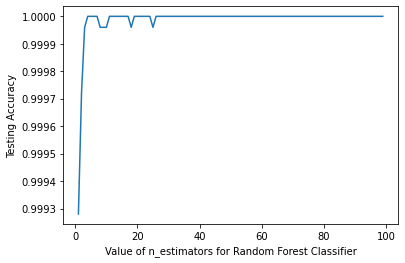

In [164]:
#Finding optimal graph for n estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [165]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
clf.fit(x_train, y_train) 
y_pred= clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9999600095976966


In [166]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3599
           1       1.00      1.00      1.00      7100
           2       1.00      1.00      1.00      1838
           3       1.00      1.00      1.00     12469

    accuracy                           1.00     25006
   macro avg       1.00      1.00      1.00     25006
weighted avg       1.00      1.00      1.00     25006



In [167]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y =x_train,y_train
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
x_train, y_train = undersample.fit_resample(X, y)
y

Counter({3: 12523, 1: 7110, 0: 3573, 2: 1800})


23339    1
42730    3
40554    3
46275    3
39172    2
        ..
21243    3
45891    3
42613    3
43567    1
2732     3
Name: sent_code, Length: 25006, dtype: int64

Text(0, 0.5, 'Testing Accuracy')

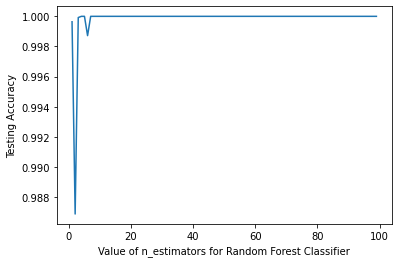

In [168]:
#Finding optimal graph for n estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [169]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
clf.fit(x_train, y_train) 
y_pred= clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [170]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3599
           1       1.00      1.00      1.00      7100
           2       1.00      1.00      1.00      1838
           3       1.00      1.00      1.00     12469

    accuracy                           1.00     25006
   macro avg       1.00      1.00      1.00     25006
weighted avg       1.00      1.00      1.00     25006

